In [1]:
import requests
from bs4 import BeautifulSoup

In [2]:
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

url = "https://www.google.co.kr/search"
params = {
    "q":"한글"
}

In [3]:
requests.get(url,params=params, headers=headers)

<Response [200]>

In [4]:
html = requests.get(url,params=params, headers=headers)

In [5]:
type(html)

requests.models.Response

In [6]:
html.encoding

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>한글 - Google 검색</title><script nonce="bOzhpE5aaHGIH1YlpRdTbw==">(function(){window.google={kEI:\'8JRNW-i6DNrahwOPvLz4Dg\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_8JRNW-i6DNrahwOPvLz4Dg\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="bOzhpE5aaHGIH1YlpRdTbw==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(v
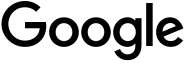
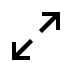
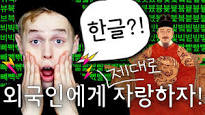
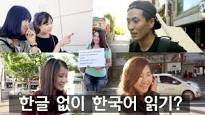
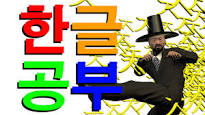
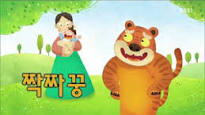
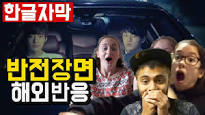
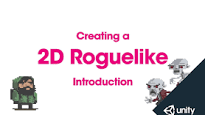
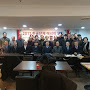
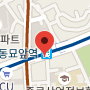
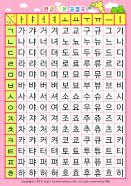
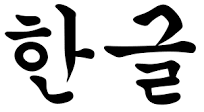
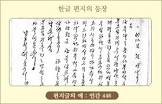
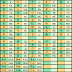
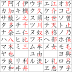
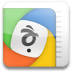

In [7]:
html.text

In [8]:
dom = BeautifulSoup(html.text,"lxml")

In [9]:
type(dom)

bs4.BeautifulSoup

In [10]:
aList = dom.select("div.rc > h3.r > a")

In [11]:
for row in aList:
    print(row["href"])
    

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://namu.wiki/w/%ED%95%9C%EC%BB%B4%EC%98%A4%ED%94%BC%EC%8A%A4%20%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [12]:
def getUrl(url, params=None, num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text,"lxml")
    links = dom.select("div.rc > h3.r > a")
    
    return [link["href"] for link in links]
    

In [13]:
links = getUrl(url, params)

In [14]:
links

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://namu.wiki/w/%ED%95%9C%EC%BB%B4%EC%98%A4%ED%94%BC%EC%8A%A4%20%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y']

In [15]:
seed = "https://www.google.co.kr/search"
queue = [seed]

In [16]:
while queue:
    url = queue.pop()
    queue.extend(getUrl(url, params))
    print(queue)
    break

['http://www.hancom.com/downLoad.downPU.do', 'https://www.hancom.com/product/productWindowsMain.do', 'https://namu.wiki/w/%ED%95%9C%EA%B8%80', 'https://namu.wiki/w/%ED%95%9C%EC%BB%B4%EC%98%A4%ED%94%BC%EC%8A%A4%20%ED%95%9C%EA%B8%80', 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80', 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8', 'https://www.korean.go.kr/hangeul/principle/001.html', 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y']


In [17]:
def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code < 600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text,"lxml")
    links = dom.select("a")
    
    return [link["href"] for link in links if link.has_attr("href")==1]

In [18]:
seed = "https://www.google.co.kr/search"

select = "div.rc > h3.r > a"

queue = getUrl(seed, params, select)

result = list()

In [19]:
while queue:
    url = queue.pop()
    queue.extend(getUrl(url, params, select))
    print(url, len(queue))
    select = "a"

https://www.google.co.kr/intl/ko/options/ 125
https://earth.google.com/web/ 124
https://keep.google.com/ 127
https://accounts.google.com/TOS?loc=KR&hl=en 163


MissingSchema: Invalid URL 'terms?gl=KR&hl=en': No schema supplied. Perhaps you meant http://terms?gl=KR&hl=en?

# 뽐뿌 크롤링 테스트

In [39]:
headers = {
    "user-agent":"Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding":"false" #헤더에 accept-encoding을 강제로 없애줌으로써 byte타입으로 받음
}

url = "http://www.ppomppu.co.kr/zboard/zboard.php"
params = {
    "id":"freeboard"
}

html = requests.get(url,params=params, headers=headers)

In [40]:
def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)

    if 500 <= html.status_code < 600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text,"html.parser")
    links = dom.select(select)
    
    return [link["href"] for link in links if link.has_attr("href")==True]

In [41]:
#a> td.list_vspace>tr.list_notice

In [42]:
html = requests.get(url,params=params, headers=headers)

In [43]:
type(html)

requests.models.Response

In [44]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard"

contentList = getUrl(seed, params, "td.list_vspace img + a")
contentList = contentList[1:]

In [45]:
html.text

'<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd">\n<html>\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta http-equiv="Content-Script-Type" content="text/javascript" />\n<meta http-equiv="Content-Style-Type" content="text/css" />\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="author" content="PPOMPPU CO.">\n<meta name="description" content="뽐뿌">\n<meta name="keywords" content="">\n\n\n<!--\n<meta name="viewport" content="width=device-width, initial-scale=1.0, minimum-scale=1.0, user-scalable=yes, target-densitydpi=device-dpi" />\n-->\n\n\n<meta property="og:image" content="http://www.ppomppu.co.kr/images/icon_app_20160427.png" />\n\n<meta property="og:site_name" content="뽐뿌" />\n\n<title>뽐뿌 - 자유게시판</title><!--<link href=\'http://fonts.googleapis.com/css?family=Noto+Sans\' rel=\'stylesheet\' type=\'text/css\'>-->\n\n<link rel="stylesheet" type="text/css" hr

In [46]:
getUrl(seed, params, "td.list_vspace img + a")

['view.php?id=regulation&page=1&divpage=202&no=6',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952097',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952096',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952095',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952094',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952093',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952092',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952091',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952090',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952089',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952088',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952087',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952086',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952085',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952084',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952083',
 'view.php?id=freeboard&page=1&divpage=1111&no=5952082',
 'view.php?id=freeboard&page=1&divpag

In [47]:
contentList[0]

'view.php?id=freeboard&page=1&divpage=1111&no=5952097'

# 뽐뿌 자유게시판 제목 컨텐트 가져오기

In [48]:
def getContent(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)

    if 500 <= html.status_code < 600 and num_retries>0:
        print(html.status_code, html.reason)
        return getUrl(url, params, num_retries-1)
    
    dom = BeautifulSoup(html.text,"html.parser")
    links = dom.select(select)
    
    return links

In [49]:
seed = "http://www.ppomppu.co.kr/zboard/"
title = getContent(seed+contentList[0], params, ".view_title2")
reply = getContent(seed+contentList[0], params, "tbody  tr  td  div.han")

In [50]:
title[0].get_text()

'LG가 SK에 매각한 실트론 근황.news'

In [51]:
for url in contentList:
    title = getContent(seed+url, params, ".view_title2")
    content = getContent(seed+url, params, "table.pic_bg table td.han")
    reply = getContent(seed+url, params, "table.info_bg td  div.han")
    tn = getContent(seed+url, params, "table.info_bg td  img")

    print("제목 : "+ title[0].get_text()+"\n\n")
    print("내용 : "+ content[0].get_text().strip('\n'))
    
   
    if reply:
        index=0
        for row in reply:
            print("re : " + reply[index].get_text().strip('\n'))
            index+=1
            
    print("-----------------------------------------------------")

        

제목 : LG가 SK에 매각한 실트론 근황.news


내용 :  



 
LG가 가진 실트론 지분을 6천억에 팔았는데
현재 기업가치만 2조원
 
 



 
 
SK에 팔자마자(2017년 1월) 영업이익 4배 증가
 
 






 
 
이젠 분기 영업이익만 1천억대...
 
 



채권단이 하이닉스 사라고 LG에 권유했던 때도 그렇고
여러모로 타이밍을 못 잡네요
 
 
 
-----------------------------------------------------
제목 : 알리에서 주문한 낚시 가짜미끼.. jpg


내용 :  



 
 
미노우라고 하는건데 농어 잡을때 쓰는겁니다.. 
 
보통 낚시방에서 싼게 8-9천원 정도 하고 
 
괜찮은건 하나에 2만원 정도씩 하죠.. 
 
 
도시어부에서 이덕화가 미노우 하루에 열개 이상 날려 먹은적도 있을거에요..ㅋㅋㅋㅋㅋ
 
역시 알리라 그런가 퀄은 그렇게 좋은 편은 아닌데 
 
가격은 1.6달러..ㅋㅋㅋㅋㅋㅋ
 
싼맛에 한번 사봤습니다.. 
 
어차피 인천에선 배타고 나가지 않는 이상 농어 낚시 할데도 없는데..;;; ㅋ
re : 쏘가리용 미노우좀 사야하는디... 좋은걸 모르겠네요.
-----------------------------------------------------
제목 : 개고기 식용은 옳은가?


내용 : http://gujoron.com/xe/?mid=column&search;_target=title&search;_keyword=개고기&document;_srl=378142

선진국 그냥 쉽게 되는게 아닙니다.
복날에 한번쯤 읽어보시길....

댓글에 말안듣는 자기소개 하실분 미리 반사~~
re : '문명인은 야만인과 대화하지 않는다.'


미치겠다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ
-----------------------------------------------------
제목 : 어머니가 갑상선일거 같은데...


내용 : 어머니가 갑상선일거 같다는데
조직검사를 더 해봐야 할거 같긴 하지

제목 : 기프트콘 같은 거 판매하실 때 팁 같은 거 있으신가요?


내용 : 예전에 한번 게임 관련된 쿠폰을 하나 판매한 적이 있는데
 
이미 사용한 쿠폰이라고 구매자분께서 환불해달라고 해서
 
몇푼 안하는거라 환불해준적이 있습니다.
 
그 이후로는 쿠폰 형식의 물품을 판매 할 때는 직접 원격으로 등록해주는 거 외에는
 
판매를 일절 안 하는데요.
 
가끔 불필요한 기프트카드나 코드가 생기면 팔고 싶지만 걱정이 돼서 그냥 사용해버립니다.
 
여러분들은 판매하실 때 따로 팁 같은게 있으신가요? ^^;
 
3자 사기부터 계좌 정지까지 사기꾼들은 참 머리도 좋은 것 같습니다..
 
저는 새가슴이라서 단돈 1,2 만 원짜리도 팔아보려고 하면 걱정이 많습니다 ㅎㅎ
re : 걍 팔아요 ..
re : 정답이네요.. ㅎㅎ
re : 계좌를 노출하지않는 이체수단으로 송금받고 보내십시오
re : 왜 그런 방식을 선호하시는지 이유를 여쭤봐도 될까요
re : 모바일 쿠폰은 고객센터에서 조회하면 사용시간이 나와요
사용시간이 판매 이전이라면 판매자 문제이고
사용시간이 판매 이후라면 구매자 문제일 때가 많습니다
무조건 환불보다는 사용시간에 따라 적절하게 처리하세요
re : 기프트카드는 어느 매장에서 사용했는지 자세하게 나온다는데,
게임쿠폰도 사용하면 사용시간이 남아있을까요?
알콩님 좋은 정보 감사합니다. ㅎㅎ
re : 저도 데이터쿠폰 판매했는데 사용된걸로 나온다고 해서 확인해보니 구매자가 자기번호 하나 잘못적은거 였어요
re : 게임쿠폰이라면 시간은 물론이고 사용한 아이디까지 나오지 않을까요?
re : 며칠 전에 모바일 쿠폰 판매했는데, 조회수 10명도 안되었는데 2명이 연락와서 제일 먼저 온 사람에게 팔았네요. 
팁이랄 건 없고, 계좌는 어디 은행이다 이런 건 밝혀놓죠. 사용 기한은 언제까지다 이런 것 적어놓으면, 금방 팔리더군요.
 입금되었는지 확인하고 보내주죠.
-----------------------------------------------------
제목 : 한식부붸 갔는데 